<a href="https://colab.research.google.com/github/charu11/ML-with-pytorch/blob/ml/ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 

In [0]:
x = torch.tensor([5, 4])
y = torch.tensor([2, 5])

print(x*y)

tensor([10, 20])


In [0]:
x = torch.zeros([4, 6])
print(x)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [0]:
# generate arrays with random value

x = torch.rand([4,6])
print(x) 
x.view([3,8])

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True, 
                       transform=transforms.Compose([
                           transforms.ToTensor()                         
                       ]))

test = datasets.MNIST('', train=False, download=True, 
                       transform=transforms.Compose([
                           transforms.ToTensor()                         
                       ]))

train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

for data in train_set:
  print(data)



In [28]:
X, y = data[0][0], data[1][0]
print(data[1])

tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])


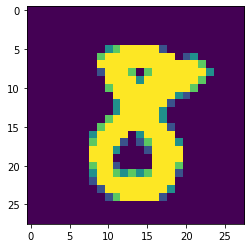

In [27]:
import matplotlib.pyplot as plt
plt.imshow(data[0][1].view(28,28))
plt.show()

In [0]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in train_set:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100.0}%")


In [7]:
# create the neural network

import torch.nn as nn  # giving the access to neural network layers types
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)




Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = torch.randn((28,28))
X = X.view(-1,28*28)
output = net(X)



In [40]:
output


tensor([[-2.2313, -2.4345, -2.3145, -2.3477, -2.2826, -2.3129, -2.3438, -2.2513,
         -2.3207, -2.2059]], grad_fn=<LogSoftmaxBackward>)

In [11]:
import torch.optim as optim
import torch.nn as nn 

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) # lr= learning rate

for epochs in range(8): # 8 full passes over the data
  for data in train_set: # 'data is a batch data'
    X,y = data    # X is batch of features, y is the batch of targets
    net.zero_grad()  # sets gradient 0 before loss calc.
    output = net(X.view(-1,784))  # passed in the reshaped batch(recall they are 28*28 at the moment)
    loss = F.nll_loss(output, y) # calc and grab the loss value
    loss.backward()  # apply this loss backward thru the networks parameters
    optimizer.step() # attempt to optimize weights to account for loss/gradient
  print(loss) # print the loss


tensor(0.2029, grad_fn=<NllLossBackward>)
tensor(0.0033, grad_fn=<NllLossBackward>)
tensor(0.0087, grad_fn=<NllLossBackward>)
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor(0.8812, grad_fn=<NllLossBackward>)
tensor(0.0652, grad_fn=<NllLossBackward>)
tensor(0.0406, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)


In [12]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_set:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print('Accuracy:', round(correct/total, 3))


Accuracy: 0.975


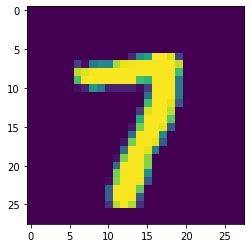

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [19]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(7)
